<a href="https://colab.research.google.com/github/devLarissaRodrigues/Bootcamp-DataAnalytics-WoMakersCode/blob/main/Exercicio_individual_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

# Cria um DataFrame com os dados
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adiciona a coluna de espécies (targets)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Ver primeiras linhas
display(df.head())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Letra a. Faça uma análise inicial sobre esse dataset


In [6]:
print(df.info())
print(df.describe())
print(df['Species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   Species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.3000

## Boxplot e Histograma

Letra b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.


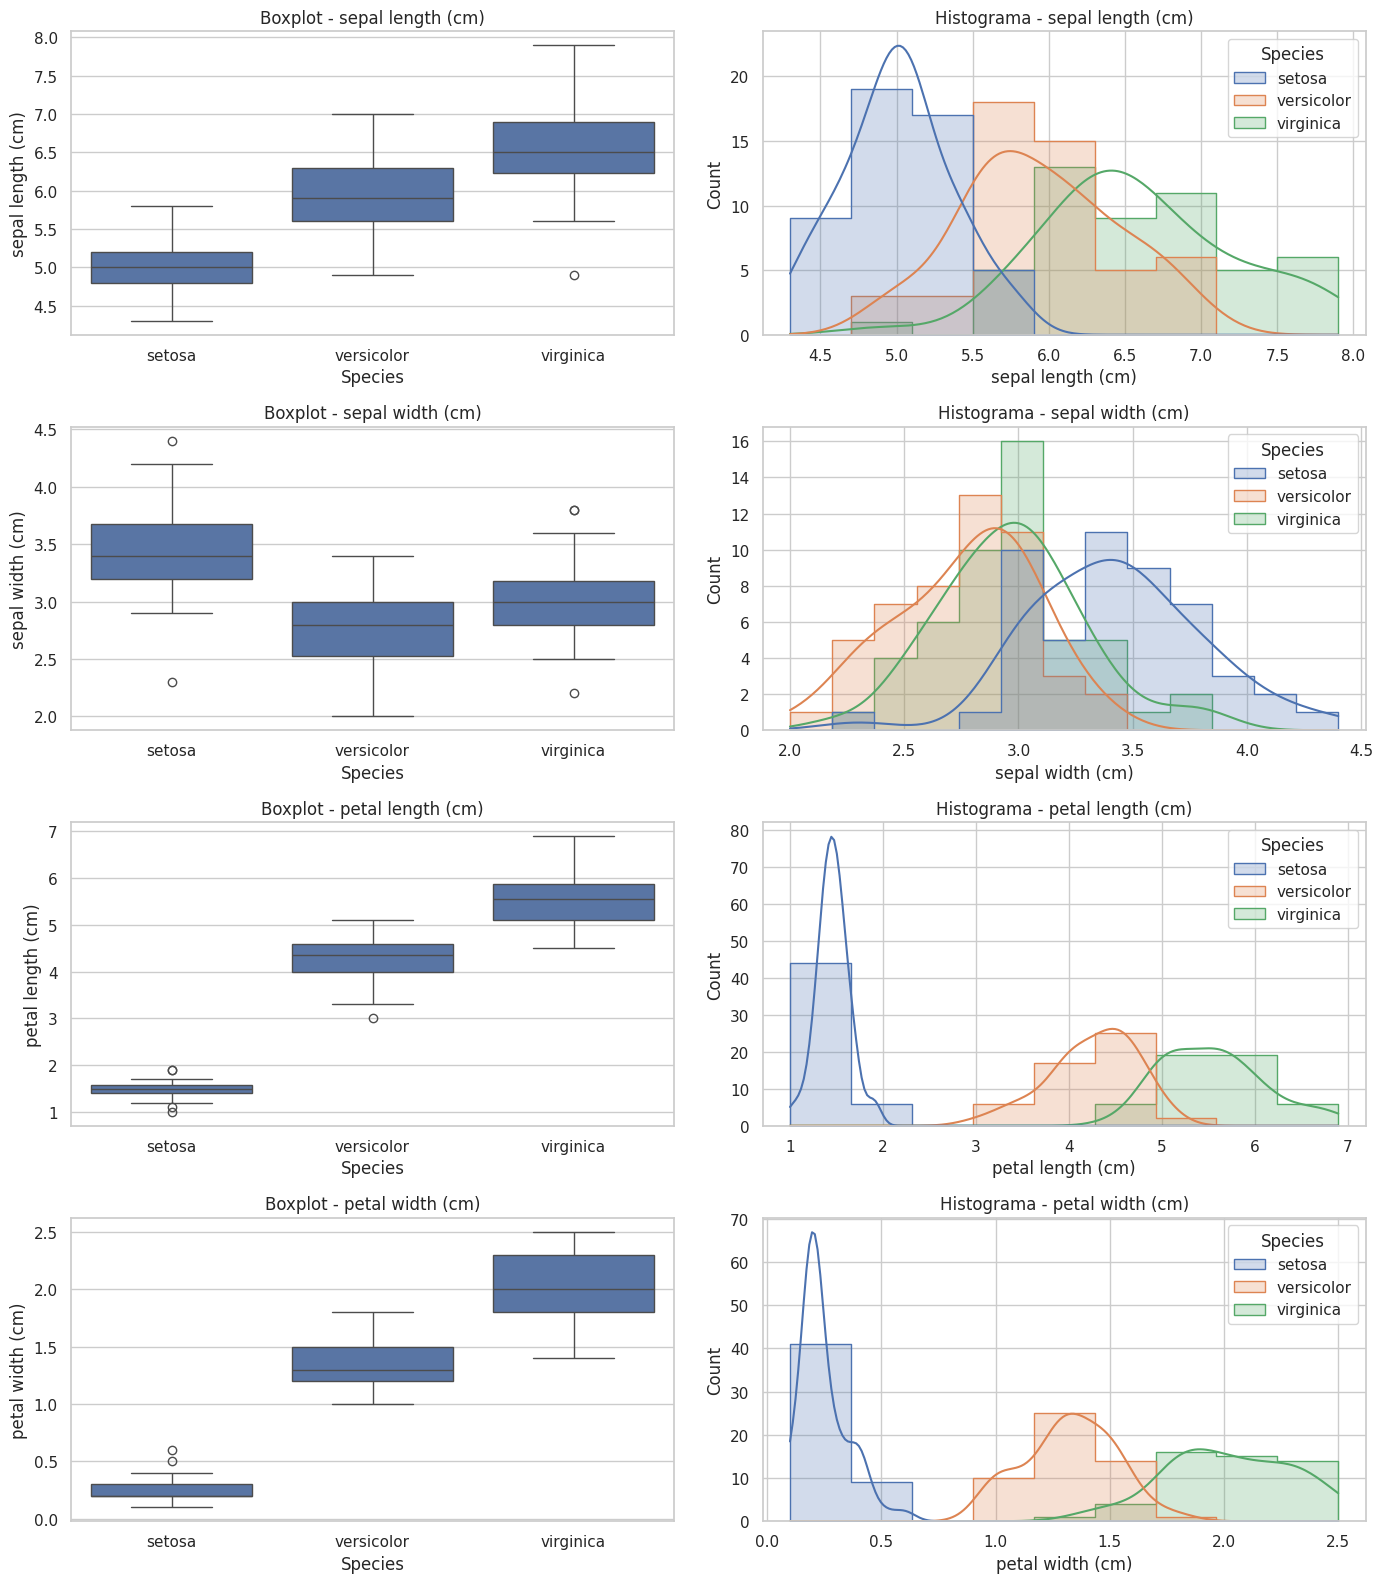

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
features = df.columns[:4]  # as 4 primeiras colunas
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

for i, feature in enumerate(features):
    # Boxplot
    sns.boxplot(x='Species', y=feature, data=df, ax=axes[i,0])
    axes[i,0].set_title(f'Boxplot - {feature}')

    # Histograma
    sns.histplot(data=df, x=feature, hue='Species',
                 kde=True, element='step', ax=axes[i,1])
    axes[i,1].set_title(f'Histograma - {feature}')

plt.tight_layout()
plt.show()


Letra c: Somente olhando esses gráficos, é possível afirmar que uma
ou mais propriedades (Sepal_Length, Sepal_Width,
Petal_Length, Petal_Width) são suficientes para distinguir as
espécies?

* Sim, parcialmente. Setosa é facilmente separável só com petal length ou petal width (valores muito menores).
* Versicolor vs. Virginica têm sobreposição, mas já mostram separação razoável nos gráficos de pétala.
* As variáveis de sépala (sepal length, sepal width) têm mais sobreposição entre todas as espécies.
* Ou seja, só com os gráficos já é possível perceber que as medidas das pétalas (comprimento e largura) são fortes candidatas para distinguir as espécies.

Letra d. Aplique a regressão logística para avaliar o modelo de
classificação.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Separar dados e rótulos
X = df.iloc[:, :-1]  # todas as colunas exceto 'Species'
y = df['Species']

# Separar em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Criar e treinar o modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)


Letra e. Calcule a acurácia, precisão e recall.


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Acurácia
acc = accuracy_score(y_test, y_pred)

# Precisão e recall para cada classe
prec = precision_score(y_test, y_pred, average=None, labels=iris.target_names)
rec = recall_score(y_test, y_pred, average=None, labels=iris.target_names)

# Exibir resultados
print(f"Acurácia: {acc:.2f}")
for i, label in enumerate(iris.target_names):
    print(f"Classe '{label}': Precisão = {prec[i]:.2f}, Recall = {rec[i]:.2f}")


Acurácia: 0.93
Classe 'setosa': Precisão = 1.00, Recall = 1.00
Classe 'versicolor': Precisão = 0.88, Recall = 0.93
Classe 'virginica': Precisão = 0.93, Recall = 0.87


Letra f. Plote a matriz de confusão com matplotlib ou seaborn.

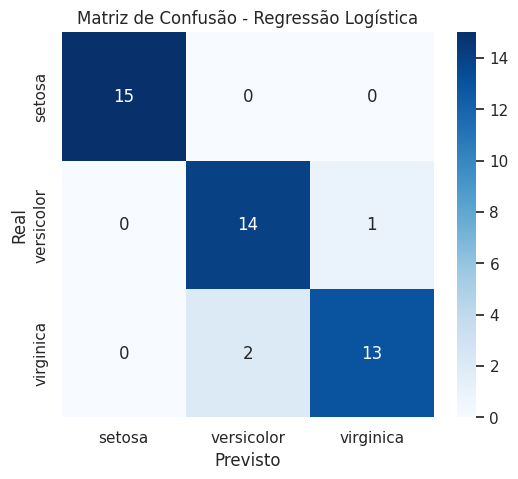

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Criar matriz
cm = confusion_matrix(y_test, y_pred, labels=iris.target_names)

# Plotar
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()


2. Utilizando o dataset load_digits. Exemplo de como fazer a
importação do dataset usando o sklearn:
from sklearn.datasets import
load_digits digits = load_digits()
Responda:
a. Faça uma análise inicial sobre esse
dataset:
i. Quantos dados possui?
ii. Existem dados nulos? Se sim quantos?
iii. Todos são dados numéricos ou existem colunas com dados
categóricos?

In [11]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

# Carregando o dataset
digits = load_digits()
X = digits.data
y = digits.target

# i. Quantos dados possui?
print(f"Número de amostras: {X.shape[0]}")
print(f"Número de atributos por amostra: {X.shape[1]}")

# ii. Existem dados nulos?
print(f"Existem dados nulos? {np.isnan(X).any()}")

# iii. Todos são dados numéricos?
df_digits = pd.DataFrame(X)
print(f"Tipos das colunas:\n{df_digits.dtypes.value_counts()}")


Número de amostras: 1797
Número de atributos por amostra: 64
Existem dados nulos? False
Tipos das colunas:
float64    64
Name: count, dtype: int64


b. Aplique a regressão logística para construir e avaliar o modelo de
classificação.




In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c. Calcule a acurácia, precisão e recall com base no desempenho do modelo.


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')

print(f"Acurácia: {acc:.2f}")
print(f"Precisão (macro): {prec:.2f}")
print(f"Recall (macro): {rec:.2f}")


Acurácia: 0.96
Precisão (macro): 0.96
Recall (macro): 0.96


d. Plote a matriz de confusão dos resultados do modelo utilizando matplotlib
ou seaborn.

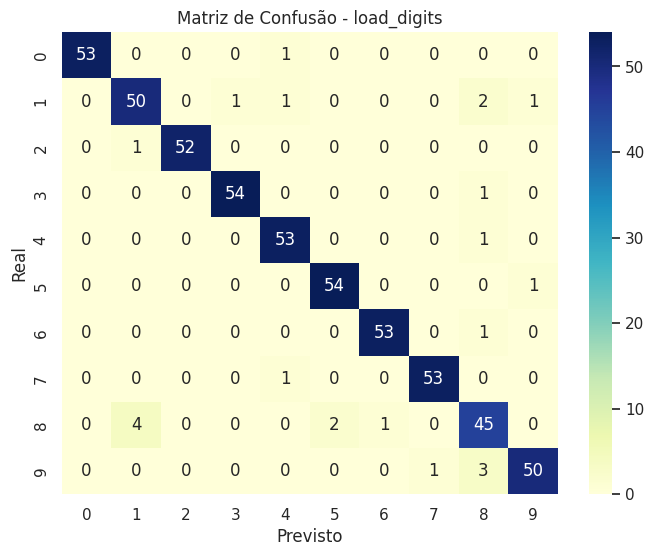

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - load_digits")
plt.show()


e. Aplique a regressão logística para avaliar o modelo de classificação dos
dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema
(por exemplo, MNIST).


In [16]:
from sklearn.datasets import fetch_openml

# Baixando o dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_mnist = mnist.data
y_mnist = mnist.target.astype('int')


f. Calcule a acurácia, precisão e recall com base no desempenho do modelo
para a classificação dos dígitos de 0 a 9.


In [ ]:
# Dividir em treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_mnist, y_mnist, test_size=0.2, random_state=42, stratify=y_mnist)

# Treinar modelo
model = LogisticRegression(max_iter=1000, solver='saga')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')

print(f"Acurácia (MNIST): {acc:.2f}")
print(f"Precisão (MNIST): {prec:.2f}")
print(f"Recall (MNIST): {rec:.2f}")


g. Plote a matriz de confusão dos resultados da classificação dos dígitos de 0
a 9 utilizando matplotlib ou seaborn.

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - MNIST")
plt.show()
